# Índice - 3.1_Prediccion_Productos

1. [Importacion de datos, librerías y configuraciones.](#importacion-de-datos-librerías-y-configuraciones)
2. [Exploracion](#exploracion)
3. [Encoding](#encoding)
4. [Feature Scaling](#feature-scaling)
5. [Predicción](#predicción)


---
---
## Importacion de datos, librerías y configuraciones.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from config import *

# vamos a importar a nuestro grupo de productos con rendimiento moderado ya que tambien
# es el grupo mas numeroso que tenemos.

df_productos = pd.read_pickle(f"{DATOS_RUTA_CLUSTERS}/productos/cluster3_productos.pkl")

---
---
## Exploracion

In [2]:
df_productos.sample(3)

,index,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
3697,2579,Xerox 1991,Office Supplies,Paper,575.57,26,254.89,0.07,7.40,21.32,6
2567,1530,O'Sullivan 2-Door Barrister Bookcase in Odessa...,Furniture,Bookcases,4886.46,31,566.47,0.15,66.32,153.83,7
1447,1321,"Fellowes Trays, Industrial",Office Supplies,Storage,5918.36,122,777.95,0.14,16.53,46.23,37


#### vamos a eliminar el nombre y el index

In [3]:
df_productos.drop(columns=['Product Name', 'index'], inplace=True)

In [4]:
vis = sup_prep.Visualizador(df_productos)

7it [00:00, 33.10it/s]


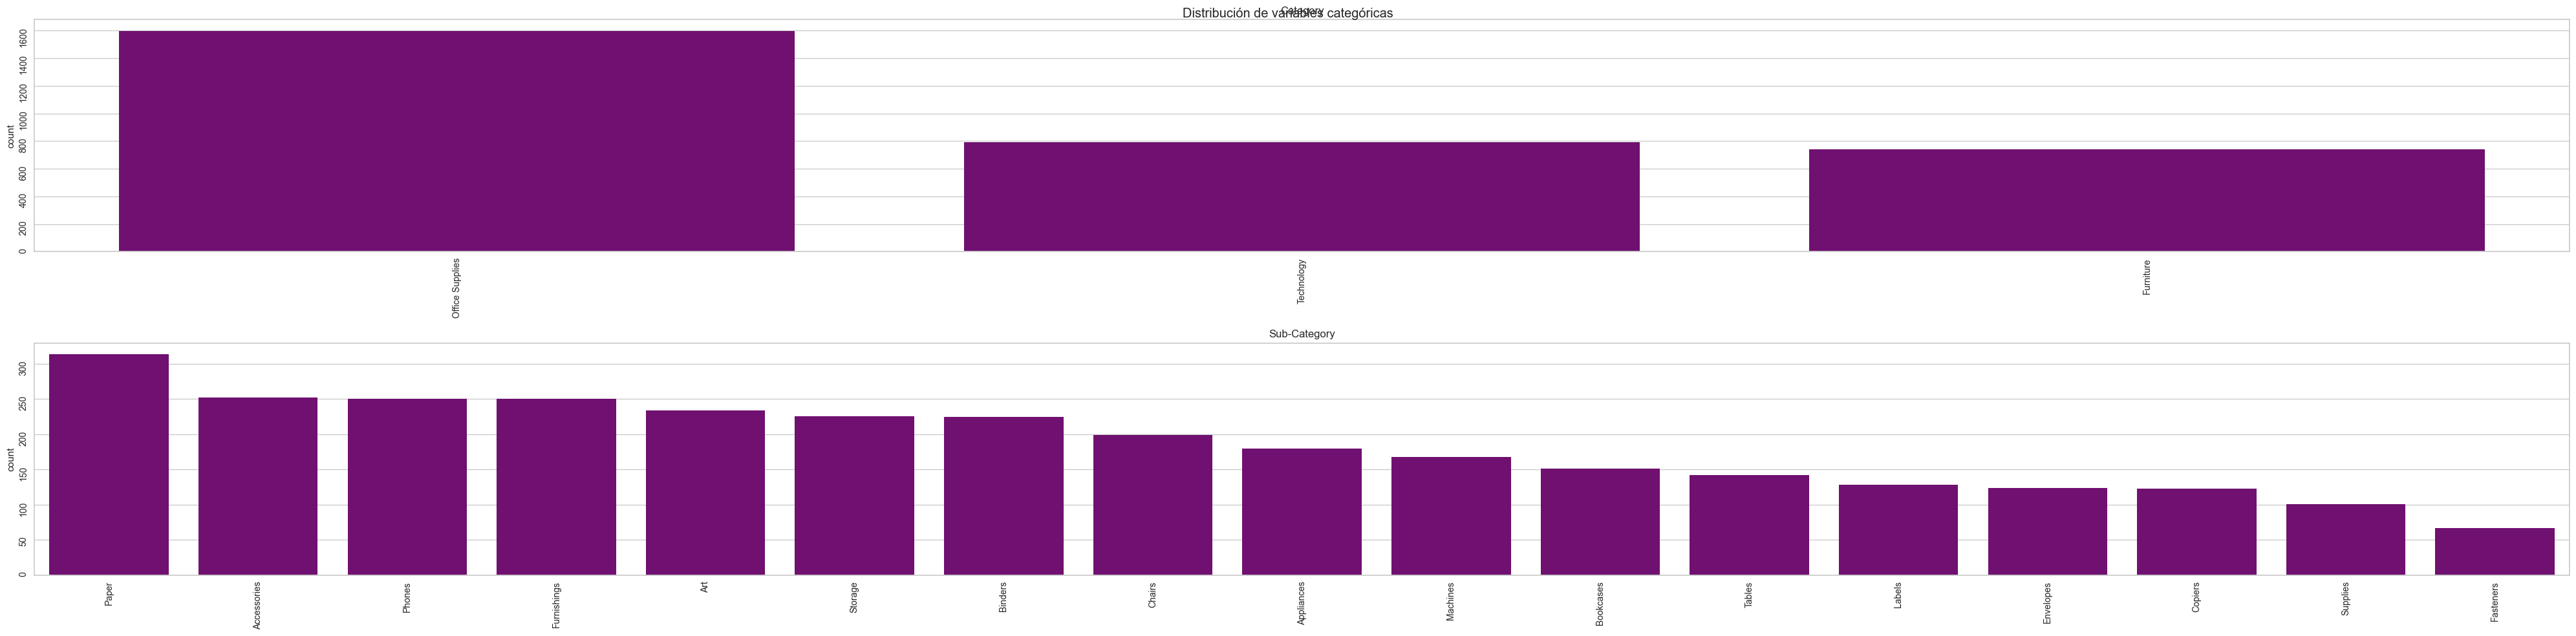

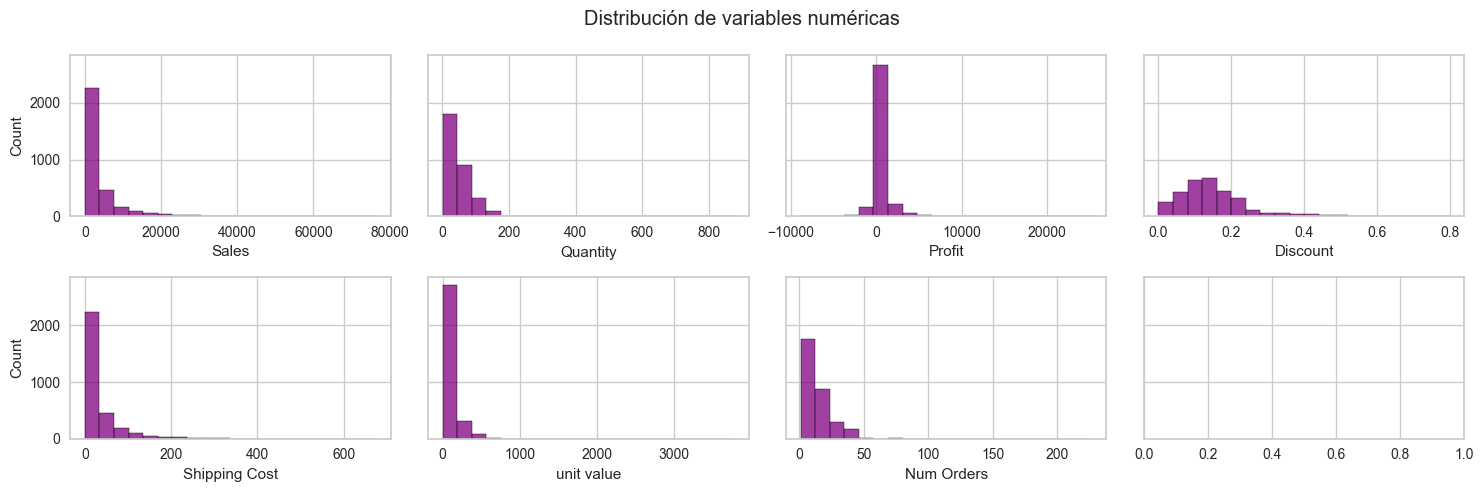

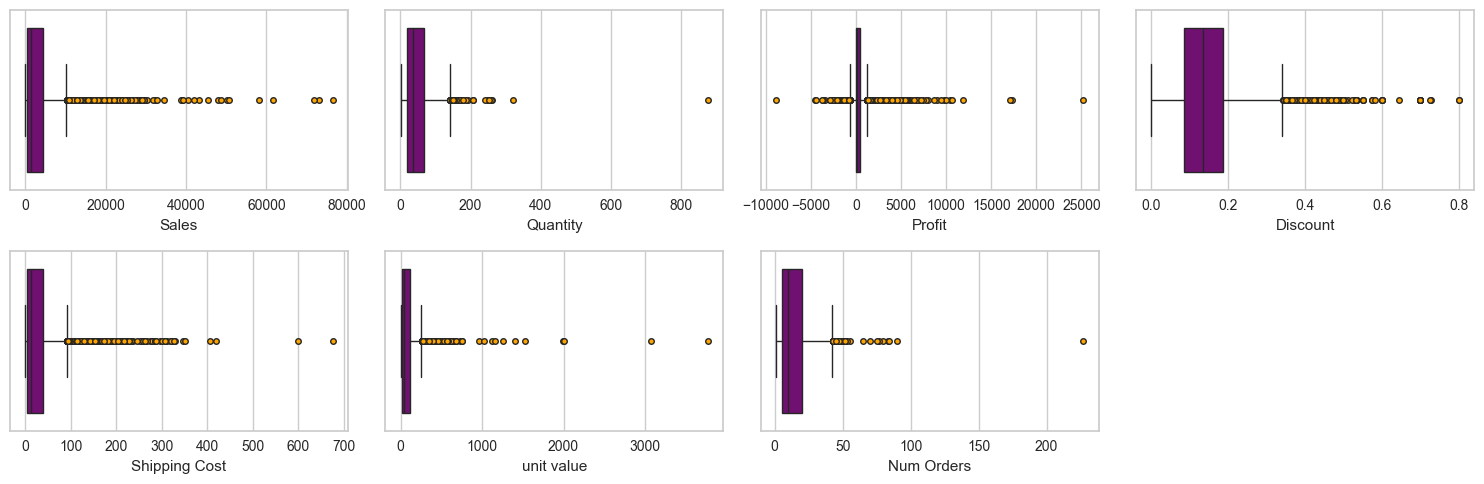

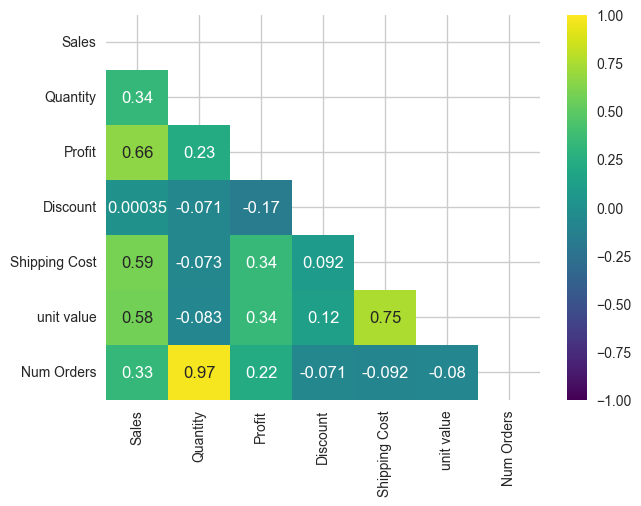

In [5]:
vis.plot_categoricas(color='purple')
vis.plot_numericas(color='purple')
vis.deteccion_outliers(color='purple')
vis.correlacion()

---
---
## Encoding

In [6]:
df_productos.sample()

,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
3455,Office Supplies,Paper,138.53,26,59.17,0.11,1.84,5.20,7


In [7]:
df_to_encode = df_productos.copy()
ordered_vars, unordered_vars = sup_encod.detectar_orden_cat(df=df_to_encode, lista_cat=df_to_encode.select_dtypes('O'), var_respuesta='Sales')

Evaluando variable: CATEGORY


Sales            1.62      6.48      7.07      7.70      7.97      8.10      \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         1         1         1         1   
Technology              0         0         0         0         0         0   

Sales            8.40      9.57      9.59      9.77      9.84      10.08     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         0         1         1         1   
Technology              0         0         1         0         0         0   

Sales            10.50     11.09     11.56     11.68     12.96     13.00     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         1         0         1         1   
Technology              0         0         0         1         0         0   

Sales            13.00     13.07     13.62     13.62     13.86     14.20     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         0         1         0         1   
Technology              0         0         1         0         1         0   

Sales            14.73     14.98     15.23     15.47     15.55     15.62     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         1         1         1         1   
Technology              0         0         0         0         0         0   

Sales            15.76     16.18     16.40     16.90     17.49     17.64     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         0         1         1         1         1         2   
Technology              1         0         0         0         0         0   

Sales            17.94     18.10     18.25     18.31     19.01     19.29     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         1         1         0         1   
Technology              0         0         0         0         1         0   

Sales            19.70     19.78     19.92     20.28     20.65     21.17     \
Category                                                                      
Furniture               1         0         0         0         0         0   
Office Supplies         0         1         1         1         1         1   
Technology              0         0         0         0         0         0   

Sales            22.40     22.88     23.33     23.52     23.86     24.19     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         1         1         1         1         1         1   
Technology              0         0         0         0         0         0   

Sales            24.27     24.55     24.98     25.70     25.92     25.96     \
Category                                                                      
Furniture               0         0         0         0         0         0   
Office Supplies         2         1         1         1         2         0   
Technology              0         0         0         0         0         1   

Sales            25.99     26.08     26.

La variable Category NO TIENE orden (sin relación con la VR) ❌ [0.3957]
___________________________________________________________________________ 

Evaluando variable: SUB-CATEGORY


Sales         1.62      6.48      7.07      7.70      7.97      8.10      \
Sub-Category                                                               
Accessories          0         0         0         0         0         0   
Appliances           1         0         0         0         0         0   
Art                  0         0         0         1         0         0   
Binders              0         0         0         0         0         0   
Bookcases            0         0         0         0         0         0   
Chairs               0         0         0         0         0         0   
Copiers              0         0         0         0         0         0   
Envelopes            0         0         1         0         0         0   
Fasteners            0         0         0         0         0         1   
Furnishings          0         0         0         0         0         0   
Labels               0         0         0         0         0         0   
Machines             0         0         0         0         0         0   
Paper                0         1         0         0         1         0   
Phones               0         0         0         0         0         0   
Storage              0         0         0         0         0         0   
Supplies             0         0         0         0         0         0   
Tables               0         0         0         0         0         0   

Sales         8.40      9.57      9.59      9.77      9.84      10.08     \
Sub-Category                                                               
Accessories          0         0         0         0         0         0   
Appliances           0         0         0         1         0         0   
Art                  1         0         0         0         1         0   
Binders              0         0         0         0         0         0   
Bookcases            0         0         0         0         0         0   
Chairs               0         0         0         0         0         0   
Copiers              0         0         0         0         0         0   
Envelopes            0         0         0         0         0         0   
Fasteners            0         0         0         0         0         0   
Furnishings          0         0         0         0         0         0   
Labels               0         0         0         0         0         0   
Machines             0         0         0         0         0         0   
Paper                0         0         0         0         0         0   
Phones               0         0         1         0         0         0   
Storage              0         0         0         0         0         0   
Supplies             0         1         0         0         0         1   
Tables               0         0         0         0         0         0   

Sales         10.50     11.09     11.56     11.68     12.96     13.00     \
Sub-Category                                                               
Accessories          0         0         0         1         0         0   
Appliances           0         0         0         0         0         0   
Art                  1         0         0         0         0         0   
Binders              0         1         0         0         0         0   
Bookcases            0         0         0         0         0         0   
Chairs               0         0         0         0         0         0   
Copiers              0         0         0         0         0         0   
Envelopes            0         0         0         0         0         0   
Fasteners            0         0         0         0         0         1   
Furnishings          0         0         0         0         0         0   
Labels               0         0         0         0         0         0   
Machines             0         0         0         0         0         0   
Paper                0         0         1    

La variable Sub-Category NO TIENE orden (sin relación con la VR) ❌ [0.2956]
___________________________________________________________________________ 

Las variables ordenadas (relacionadas) son: []

Las variables no ordenadas (no relacionadas) son: ['Category', 'Sub-Category']
___________________________________________________________________________ 



In [8]:
encoding_dict = {"onehot": unordered_vars, 
                "dummies": [], 
                'ordinal' : { },
                "label": [],
                "frequency": [],
                "target": []
                }

encoder = sup_encod.Encoding(df_to_encode, encoding_dict, variable_respuesta='Sales')

df_encoded, one_hot_transformer = encoder.one_hot_encoding()

df_encoded.sample(3)

,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
1230,782.41,47,-21.74,0.18,5.88,18.12,15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3477,149.26,34,37.41,0.06,2.38,4.63,7,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2226,2393.24,7,-878.77,0.23,112.09,357.59,2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [9]:
joblib.dump(one_hot_transformer, f"{TRANSFORMERS_RUTA_GOOD_ONES}/productos/one_hot_productos.pkl")

['c:\\HACKIO_DATA\\BOOTCAMP\\PROYECTOS\\Proyecto9\\transformers/good_ones/productos/one_hot_productos.pkl']

---
---
## Feature Scaling

In [10]:
df_to_transform = df_encoded.copy()
num_cats = df_to_encode.select_dtypes(include=['number', np.number])

num_cats.sample()

,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
3078,3261.52,76,1371.84,0.05,17.14,42.51,25


In [11]:
num_cats.drop(columns=['Sales'],inplace=True)

In [12]:
scaler = sup_fea.FeatureScaling(num_cats, num_cats.columns)

df_num_cats_scaled = scaler.robust_scaler(path=f"{TRANSFORMERS_RUTA_GOOD_ONES}/productos/", transformer_name='robust_scaler_productos')

df_num_cats_scaled.sample()

,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
2438,-0.22,-0.20,-0.47,-0.35,-0.32,-0.20


In [13]:
df_encoded[num_cats.columns] = df_num_cats_scaled

df_encoded.sample()

,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
2883,3217.69,1.02,1.76,0.00,0.09,0.01,0.87,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


---
---
## Predicción

In [14]:
X = df_encoded.drop(columns=['Sales'])
y = df_encoded[['Sales']]

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42, shuffle=True)


# Parámetros a evaluar
params_arbol = {
    'max_depth': [2,3,4,5],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_leaf_nodes': [5, 10, 12, 15]
}


grid_search_arbol=GridSearchCV(sup_regre.DecisionTreeRegressor(), param_grid=params_arbol, cv=7, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [5, 10, 12, 15],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [15]:
modelo_final_arbol=grid_search_arbol.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=15, min_samples_leaf=5,
                      min_samples_split=5)

In [16]:
y_pred_test_arb= modelo_final_arbol.predict(X_test)
y_pred_train_arb= modelo_final_arbol.predict(X_train)
df_metricas_arbol= sup_regre.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol=df_metricas_arbol.T
df_metricas_arbol.reset_index(inplace=True)
df_metricas_arbol

,index,r2_score,MAE,MSE,RMSE
0,train,0.87,1218.96,4585868.12,2141.46
1,test,0.84,1444.28,7074683.34,2659.83
